In [14]:
%pylab inline
import numpy as np
from sklearn.cross_validation import train_test_split

Populating the interactive namespace from numpy and matplotlib


In [15]:
# load train and test data
mnist_train = np.loadtxt('../data/train.csv', delimiter=',', dtype=int, skiprows=1)
mnist_test = np.loadtxt('../data/test.csv', delimiter=',', dtype=int, skiprows=1)

In [16]:
# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(mnist_train[:,1:], mnist_train[:,0])
X_train[0,:].shape

(784L,)

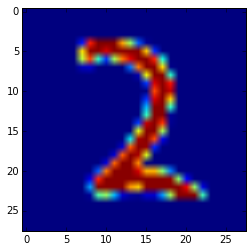

In [17]:
image = X_train[0,:].reshape(28, 28)
plt.imshow(image)

In [18]:
from skimage.transform import AffineTransform, warp, rotate

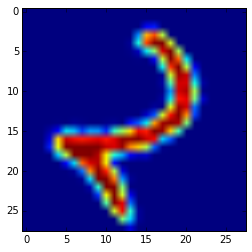

In [28]:
#tform = AffineTransform(scale=(1,1), rotation=np.pi/4, translation=(0,0))
#out = warp(image, tform)
out = rotate(image, -45, preserve_range=True)
plt.imshow(out)

In [29]:
max_rot = 45
num_rot = 64
angles = np.linspace(-max_rot, max_rot, num_rot)

In [30]:
X_rot = np.empty((0,784), int)
for angle in angles:
    X_rot = numpy.vstack([X_rot, rotate(image, angle, preserve_range=True).reshape(784)])

In [31]:
X_rot.shape

(64L, 784L)

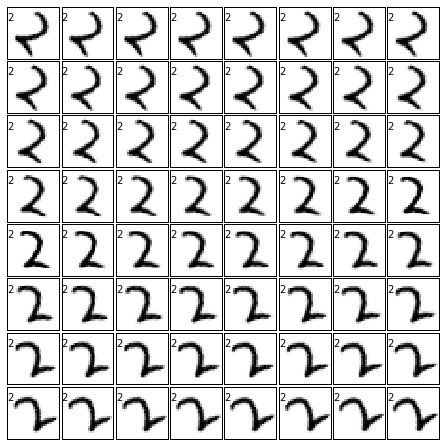

In [32]:
# copied from notebook 02A_representation_of_data.ipynb
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_rot[i].reshape(28, 28), cmap=plt.cm.Greys, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(y_train[0]))

In [41]:
from skimage.measure import EllipseModel
from skimage.draw import ellipse

In [77]:
out = rotate(image, -20, preserve_range=True)
em = EllipseModel()
em.estimate(np.transpose(np.nonzero(out)))
[xc, yc, a, b, theta] = em.params
print xc, yc, a, b, theta

3894.58250239 -408.033868362 3951.17931131 20.2470835151 -0.108175070621


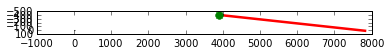

In [78]:
fig, ax = plt.subplots()
ax.imshow(out, cmap=plt.cm.gray)
x1 = xc + a*cos(theta)
y1 = yc - a*sin(theta)
x2 = xc - b*sin(theta)
y2 = yc - b*cos(theta)

ax.plot((xc, x1), (yc, y1), '-r', linewidth=2.5)
ax.plot((xc, x2), (yc, y2), '-r', linewidth=2.5)
ax.plot(xc, yc, '.g', markersize=15)